In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# List of files and corresponding city names
files = ['Islamabad_export.csv', 'Karachi_export.csv', 'Lahore_export.csv', 'Peshawar_export.csv', 'Quetta_export.csv']
cities = ['Islamabad', 'Karachi', 'Lahore', 'Peshawar', 'Quetta']

# Combine data from all cities into one DataFrame
dataframes = []
for file, city in zip(files, cities):
    df = pd.read_csv(file)
    df['city'] = city  # Add a city column
    dataframes.append(df)

# Concatenate all DataFrames
combined_data = pd.concat(dataframes, ignore_index=True)

# Convert 'date' column to datetime
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Handle missing data (example: fill missing values with 0 or drop rows)
combined_data.fillna(0, inplace=True)
combined_data.to_csv("combined_data.csv")
combined_data

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
0,2024-01-01,11.5,6.3,19.0,0.0,0.0,128.0,3.4,0.0,1019.9,0.0,Islamabad
1,2024-01-02,8.0,5.4,13.3,0.0,0.0,125.0,4.3,0.0,1019.7,0.0,Islamabad
2,2024-01-03,7.2,5.2,12.6,0.0,0.0,153.0,3.2,0.0,1020.1,0.0,Islamabad
3,2024-01-04,9.2,4.8,16.1,0.0,0.0,149.0,3.1,0.0,1019.8,0.0,Islamabad
4,2024-01-05,10.8,6.0,16.1,0.0,0.0,162.0,2.1,0.0,1019.5,0.0,Islamabad
...,...,...,...,...,...,...,...,...,...,...,...,...
1670,2024-11-26,12.3,4.0,20.5,0.0,0.0,164.0,7.5,0.0,1019.8,0.0,Quetta
1671,2024-11-27,11.9,3.5,20.5,0.0,0.0,172.0,6.9,0.0,1018.2,0.0,Quetta
1672,2024-11-28,13.0,6.5,21.5,0.0,0.0,150.0,7.1,0.0,1016.5,0.0,Quetta
1673,2024-11-29,10.9,7.4,15.3,14.2,0.0,164.0,11.0,0.0,1018.3,0.0,Quetta


c:\Users\razab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\razab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


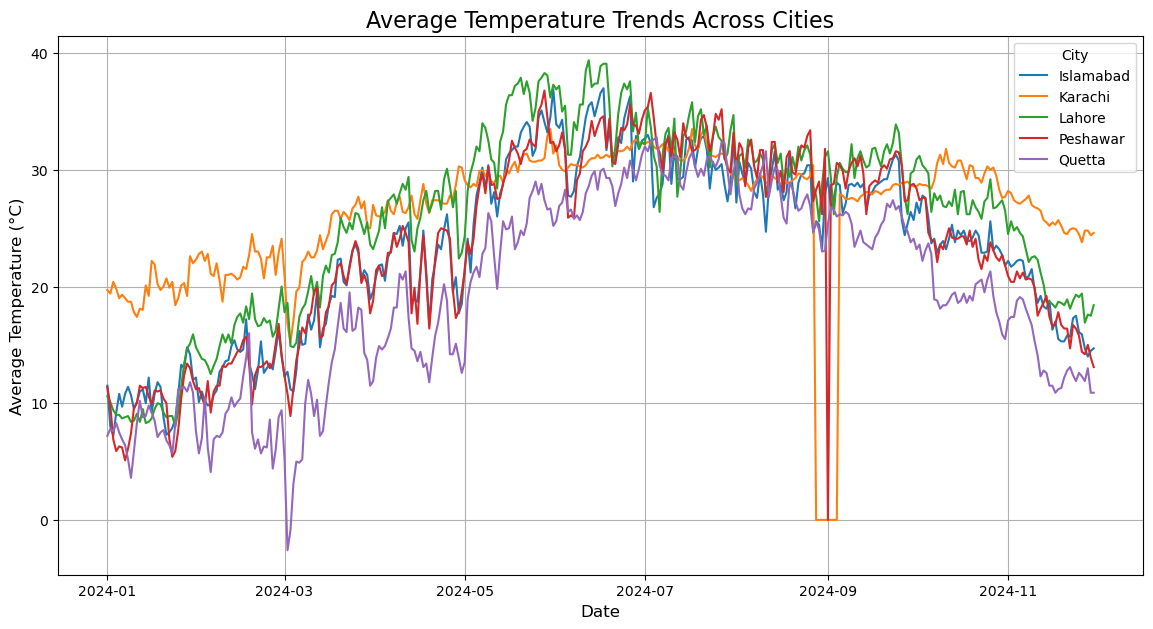

In [4]:
import seaborn as sns
# Plot temperature trends across all cities
plt.figure(figsize=(14, 7))  # Set the figure size
sns.lineplot(data=combined_data, x='date', y='tavg', hue='city')  # Line plot with hue for city

# Add title, axis labels, and legend
plt.title('Average Temperature Trends Across Cities', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(title='City')  # Add a legend with the title 'City'
plt.grid(True)  # Add a grid for better readability
plt.show()


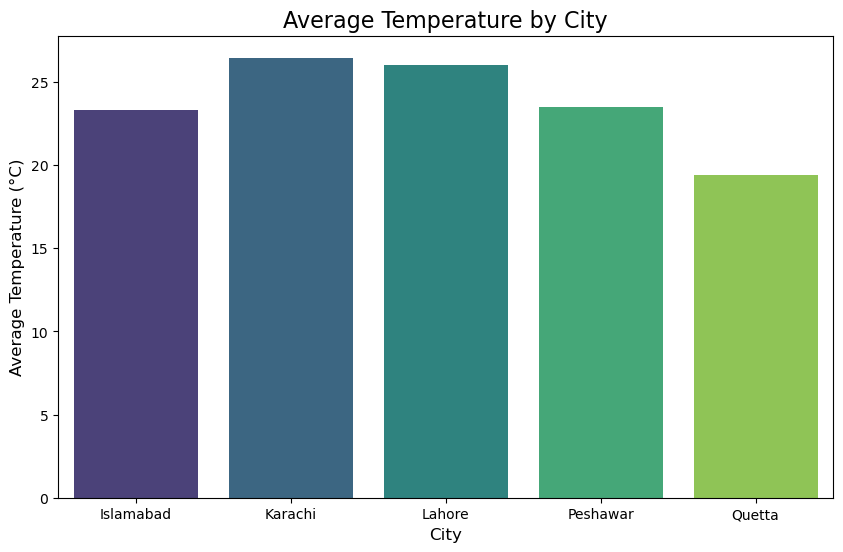

In [5]:
# Group data by city and calculate average temperature
avg_temp_per_city = combined_data.groupby('city')['tavg'].mean().reset_index()

# Create a bar plot for average temperature per city
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=avg_temp_per_city, x='city', y='tavg', palette='viridis')  # Bar plot with viridis palette

# Add title and axis labels
plt.title('Average Temperature by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.show()


In [ ]:
# Plot precipitation trends across all cities
plt.figure(figsize=(14, 7))  # Set the figure size
sns.lineplot(data=combined_data, x='date', y='prcp', hue='city', palette='coolwarm')  # Line plot for precipitation

# Add title, axis labels, and legend
plt.title('Precipitation Trends Across Cities', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)
plt.legend(title='City')  # Add a legend with the title 'City'
plt.grid(True)  # Add a grid for better readability
plt.show()
